In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.statespace.varmax import VARMAX
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sktime.performance_metrics.forecasting import smape_loss, mase_loss
import warnings
import math
warnings.filterwarnings("ignore")
from sktime.forecasting.all import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

from sktime.performance_metrics.forecasting import mean_absolute_error
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error
from itertools import accumulate
import itertools

C:\Users\shubh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\shubh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## DataLoading

In [28]:
vardata = pd.read_csv('data_varma.csv').set_index('date')
vardata.index = pd.to_datetime(vardata.index)
vardata

,EURUSD,NZDUSD,GBPUSD,CADUSD,JPYUSD,gbp_spread,eur_spread,cad_spread,nzd_spread,jpy_spread
date,,,,,,,,,,
2004-08-20,0.81140,1.4859,0.54910,1.2980,109.320,1.447368,0.173685,1.099415,1.795322,0.214035
2004-08-23,0.81990,1.4981,0.55120,1.3065,109.470,1.453757,0.171682,1.098266,1.774566,0.220231
2004-08-24,0.82650,1.5328,0.55760,1.3048,109.630,1.453757,0.171687,1.112717,1.794798,0.219364
2004-08-25,0.82710,1.5354,0.55660,1.3047,110.380,1.439306,0.171692,1.106936,1.794798,0.228035
2004-08-26,0.82750,1.5411,0.55740,1.3123,109.730,1.450292,0.173705,1.114035,1.809942,0.226023
...,...,...,...,...,...,...,...,...,...,...
2019-12-25,0.90145,1.5030,0.77035,1.3142,109.525,0.320349,-0.206202,0.949612,0.782946,-0.064535
2019-12-26,0.90070,1.5002,0.76880,1.3124,109.670,0.320581,-0.208333,0.945736,0.781008,-0.069767
2019-12-27,0.89490,1.4919,0.76390,1.3073,109.470,0.328452,-0.215476,0.964286,0.797619,-0.071429


In [29]:
df_diff = vardata.diff(1).dropna()
train, test = temporal_train_test_split(df_diff)

Text(0.5, 1.0, 'VARMA Order - BIC')

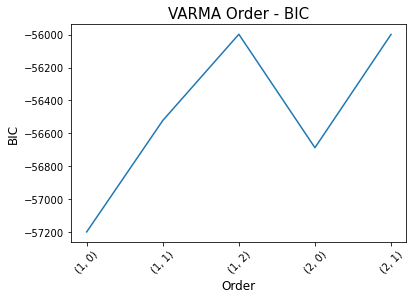

In [30]:
p = list(np.arange(1, 3, 1))
q = list(np.arange(0, 3, 1))
comb = [p,q]
results_bic =[]
pq_pair = []
for param in list(itertools.product(*comb)):
    p,q = param[0],param[1]
    model = VARMAX(test, order= (p,q))
    try:
        results = model.fit(maxiter=200, disp=False)
        pq_pair.append((p,q))
        results_bic.append(results.bic)
    except:
        continue
        
plt.plot([str(i) for i in pq_pair], results_bic)
plt.xticks(rotation = 45)
plt.xlabel("Order", fontsize = 12)
plt.ylabel("BIC", fontsize = 12)
plt.title('VARMA Order - BIC', fontsize = 15)

### Based on the above information we will train the data using p = 1, q=0

In [32]:
varma_model = VARMAX(train, order= (1,0))
results = varma_model.fit(maxiter=200, disp=False)
results.summary()

Dep. Variable:,"['EURUSD', 'NZDUSD', 'GBPUSD', 'CADUSD', 'JPYUSD', 'gbp_spread', 'eur_spread', 'cad_spread', 'nzd_spread', 'jpy_spread']",No. Observations:,2990
Model:,VAR(1),Log Likelihood,77763.936
,+ intercept,AIC,-155197.873
Date:,"Fri, 03 Jun 2022",BIC,-154207.373
Time:,18:27:46,HQIC,-154841.532
Sample:,0,,
,- 2990,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.03, 0.01, 0.03, 0.06, 0.01, 2.34, 0.01, 0.19, 0.18, 0.33",Jarque-Bera (JB):,"1064.14, 7567.44, 2242.90, 1200.58, 2485.80, 18308.36, 277467.25, 13083.90, 33217.83, 18241.76"
Prob(Q):,"0.87, 0.93, 0.87, 0.81, 0.92, 0.13, 0.94, 0.66, 0.67, 0.57",Prob(JB):,"0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"1.58, 1.06, 1.76, 0.69, 1.08, 3.25, 57.57, 9.37, 14.42, 2.73",Skew:,"-0.26, 0.75, 0.37, -0.06, -0.32, 0.60, 2.15, -0.02, 0.53, 0.59"


In [34]:
df_preds

,EURUSD,NZDUSD,GBPUSD,CADUSD,JPYUSD,gbp_spread,eur_spread,cad_spread,nzd_spread,jpy_spread
date,,,,,,,,,,
2016-03-01,0.001103,0.001393,0.000419,0.000530,0.220341,0.008947,0.001784,0.000559,-0.007632,-0.000603
2016-03-02,-0.000073,-0.000055,-0.000048,-0.000042,-0.031539,-0.001613,-0.000398,-0.000361,0.002783,0.000182
2016-03-03,0.000063,0.000039,0.000066,0.000050,0.008128,-0.000085,-0.000066,-0.000145,-0.000494,-0.000202
2016-03-04,0.000038,0.000008,0.000050,0.000013,0.002197,-0.000264,-0.000093,-0.000184,0.000328,-0.000099
2016-03-07,0.000041,0.000015,0.000052,0.000022,0.002872,-0.000252,-0.000091,-0.000167,0.000164,-0.000122
...,...,...,...,...,...,...,...,...,...,...
2019-12-25,0.000041,0.000013,0.000052,0.000020,0.002831,-0.000251,-0.000091,-0.000172,0.000188,-0.000118
2019-12-26,0.000041,0.000013,0.000052,0.000020,0.002831,-0.000251,-0.000091,-0.000172,0.000188,-0.000118
2019-12-27,0.000041,0.000013,0.000052,0.000020,0.002831,-0.000251,-0.000091,-0.000172,0.000188,-0.000118


In [35]:
yhat = results.forecast(steps=len(test))
# clean up yhat
idx=test.index
df_preds = pd.DataFrame(yhat).set_index(idx)[['EURUSD','NZDUSD','GBPUSD','CADUSD','JPYUSD']]
df_preds.columns = ['EURUSD','NZDUSD','GBPUSD','CADUSD','JPYUSD']
forecast_results = pd.concat([vardata[-1-len(test):-len(test)][df_preds.columns],df_preds], axis=0)\
                    .reset_index(drop=True).cumsum().drop([0]).set_index(idx)

forecast_results.columns = ['EURUSD_forecast','NZDUSD_forecast','GBPUSD_forecast','CADUSD_forecast','JPYUSD_forecast']
forecast_results

,EURUSD_forecast,NZDUSD_forecast,GBPUSD_forecast,CADUSD_forecast,JPYUSD_forecast
date,,,,,
2016-03-01,0.909403,1.472193,0.703319,1.334230,114.130341
2016-03-02,0.909330,1.472138,0.703271,1.334188,114.098802
2016-03-03,0.909393,1.472177,0.703337,1.334238,114.106931
2016-03-04,0.909430,1.472186,0.703387,1.334251,114.109128
2016-03-07,0.909471,1.472200,0.703439,1.334273,114.112000
...,...,...,...,...,...
2019-12-25,0.949543,1.485501,0.754548,1.354335,116.909086
2019-12-26,0.949584,1.485515,0.754600,1.354355,116.911917
2019-12-27,0.949625,1.485528,0.754651,1.354375,116.914748


In [36]:
def plot_results(y_train, y_test, y_pred):
    # plot the results
    y_train.plot(figsize = (15,7))
    y_test.plot()
    y_pred.plot()
    plt.legend(['y_train','y_test','y_pred'])
    plt.title(y_train.name+ ' Pred vs test',fontsize = 15)
    plt.show()

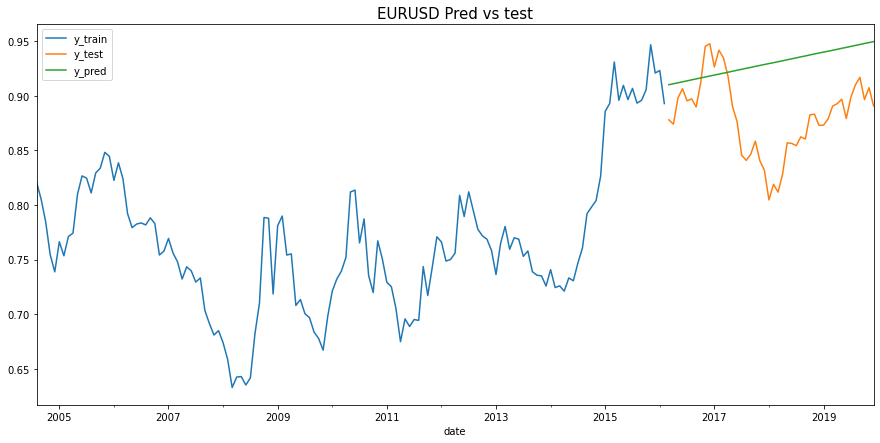

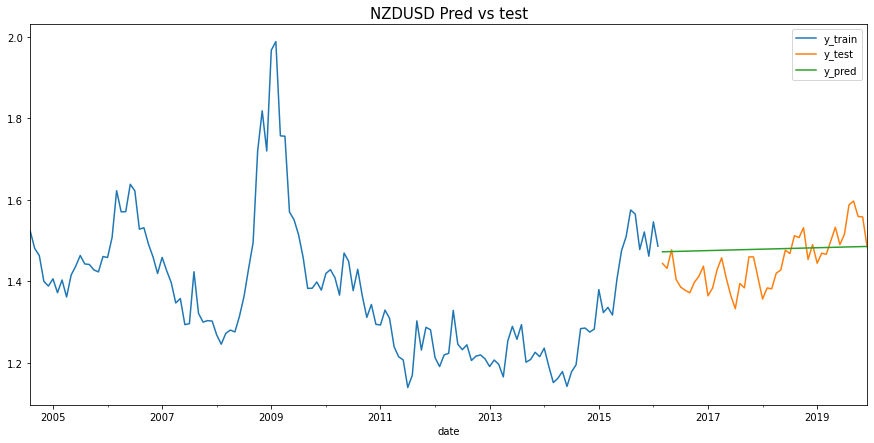

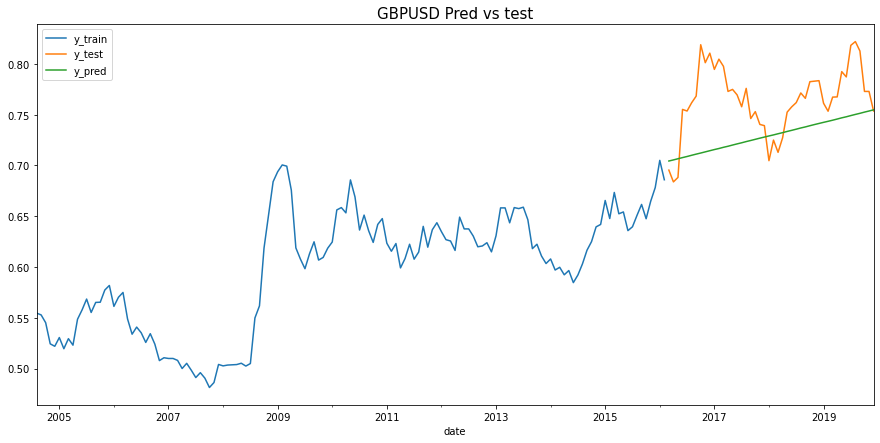

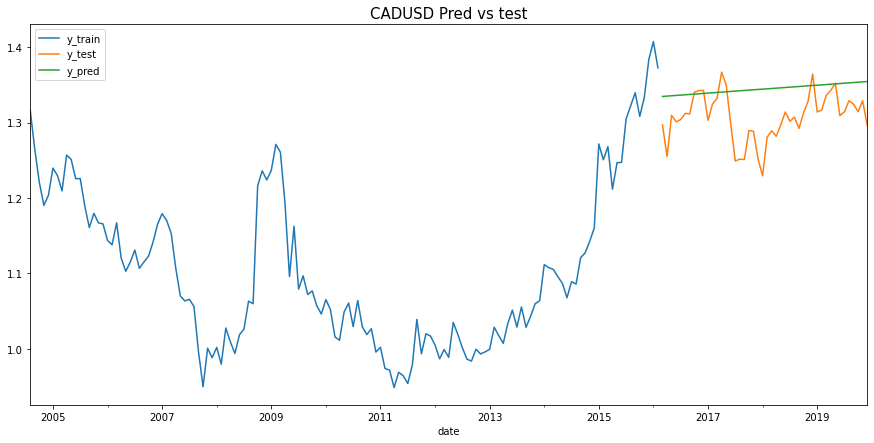

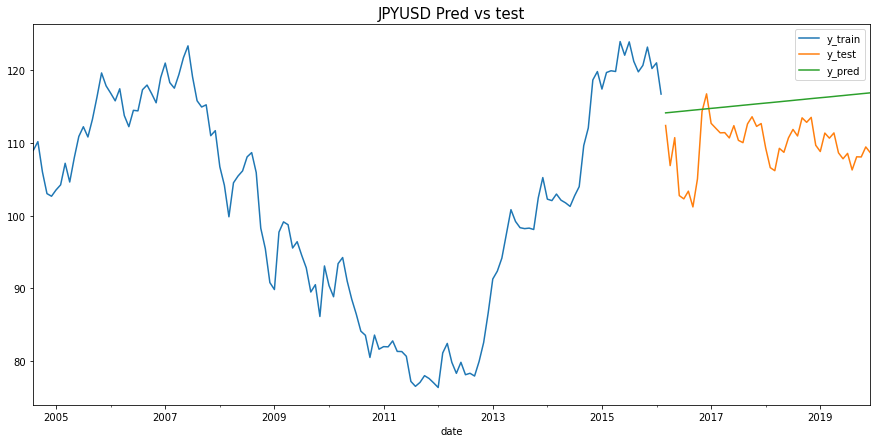

In [37]:
plot_results(vardata.iloc[1:len(train),0].resample('M').last(),vardata.iloc[-len(test):,0].resample('M').last(),forecast_results.iloc[:,0].resample('M').last())
plot_results(vardata.iloc[1:len(train),1].resample('M').last(),vardata.iloc[-len(test):,1].resample('M').last(),forecast_results.iloc[:,1].resample('M').last())
plot_results(vardata.iloc[1:len(train),2].resample('M').last(),vardata.iloc[-len(test):,2].resample('M').last(),forecast_results.iloc[:,2].resample('M').last())
plot_results(vardata.iloc[1:len(train),3].resample('M').last(),vardata.iloc[-len(test):,3].resample('M').last(),forecast_results.iloc[:,3].resample('M').last())
plot_results(vardata.iloc[1:len(train),4].resample('M').last(),vardata.iloc[-len(test):,4].resample('M').last(),forecast_results.iloc[:,4].resample('M').last())

In [12]:
def model_evaluate(y_test, y_pred,y_train, var):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = MeanAbsolutePercentageError(symmetric=False)
    mape = mape(y_test, y_pred)
    smape = MeanAbsolutePercentageError()
    smape_val = smape(y_test, y_pred)
    mase = mean_absolute_scaled_error(y_test, y_pred, y_train = y_train)
    return pd.DataFrame([[mae,mse,rmse,mape,smape_val,mase]],columns = ['MAE','MSE','RMSE','MAPE','sMAPE','MASE'],index= ['Test vs Pred - ' + var])

In [38]:
eur_summary_data = model_evaluate(vardata.iloc[-len(test):,0], forecast_results.iloc[:,0],vardata.iloc[1:len(train),0], 'EURUSD')
nzd_summary_data = model_evaluate(vardata.iloc[-len(test):,1], forecast_results.iloc[:,1],vardata.iloc[1:len(train),1], 'NZDUSD')
gbp_summary_data = model_evaluate(vardata.iloc[-len(test):,2], forecast_results.iloc[:,2],vardata.iloc[1:len(train),2], 'GBPUSD')
cad_summary_data = model_evaluate(vardata.iloc[-len(test):,3], forecast_results.iloc[:,3],vardata.iloc[1:len(train),3], 'CADUSD')
jpy_summary_data = model_evaluate(vardata.iloc[-len(test):,4], forecast_results.iloc[:,4],vardata.iloc[1:len(train),4], 'JPYUSD')

In [39]:
pd.concat([eur_summary_data, nzd_summary_data, gbp_summary_data, cad_summary_data,jpy_summary_data], axis = 0)

,MAE,MSE,RMSE,MAPE,sMAPE,MASE
Test vs Pred - EURUSD,0.052917,0.003739,0.061148,0.061334,0.058938,15.513441
Test vs Pred - NZDUSD,0.055623,0.004429,0.066550,0.039021,0.038289,6.231924
Test vs Pred - GBPUSD,0.040983,0.002406,0.049055,0.052405,0.054325,16.019114
Test vs Pred - CADUSD,0.038595,0.002253,0.047468,0.030014,0.029346,8.051921
Test vs Pred - JPYUSD,5.812619,44.063526,6.638036,0.053861,0.052007,12.734523
